В этом задании мы должны научить машину понимать тексты. В файле recs.txt находятся отзывы о разных фильмах. Наша модель машинного обучения должна проанализировать отзыв и ответить на простой вопрос: понравился ли пользователю просмотренный фильм.

Подключите необходимые для работы пакеты: pandas as pd, numpy as np, nltk, re, все функции из sklearn

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import sklearn as sk
import matplotlib.pyplot as plt
from tqdm import tqdm

Увеличьте ширину выводимой информации в DataFrame (на это понадобится для показа текстов отзывав):
pd.set_option('max_colwidth',600)

In [2]:
pd.set_option('max_colwidth',600)

Прочтите данные из файла recs.txt, в качестве разделителя (параметр sep) там выступает строка "\\-\\-\\|\\|\\|\\-\\-", кодировка (параметр encoding) - 'utf-8'.

Выведите три первых строки таблицы. Какое отношение (Sentiment) у авторов отзывов к просмотренным фильмам?

In [3]:
data = pd.read_csv('recs.txt',sep = "\-\-\|\|\|\-\-",encoding = 'utf-8')
data.head(3)#Отрицательное у 1 автора. Положительное у 2 вторых.

c:\python 3.7.7\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Sentiment,URL,Text
0,-1,kinopoisk.ru/user/72383/comment/846161/,"На самых первых титрах у меня появилось абсолютно твёрдое и непоколебимое ощущение, что я смотрю совершено детский фильм, в духе «Детей шпионов», иначе как объяснить наличие в начальных титрах техно-музыки и огромнейшего, просто колоссальнейшего наличия компьютерной графики, уровня приставок фирмы Sega. Если кто из вас по детству удосужился сыграть в видео-игру по мотивам мультфильма «Король-лев», адаптированную специально для этого платформера, тот прекрасно меня поймёт. Для полноты картины не хватает только мангуста Димона, который выдал бы в камеру памятное «It starts!». Хотя в данном ф..."
1,1,kinopoisk.ru/user/697175/comment/805374/,"Вы знаете, неожиданно хороший фильм. Я не большой любитель фильмов такого жанра, но этот мне очень понравился, совсем не ожидала. Придраться, как бы сильно ни хотелось это сделать, не к чему: Сюжет необычный, непривычный, оригинальный и оторваться от просмотра практически невозможно. Весь фильм проходит в движении: вечно что-то случается, открываются какие-то тайны, всевозможные неожиданные повороты и напряженные моменты. Как я уже сказала, если начнете смотреть этот фильм, остановиться уже не сможете. Я, к примеру, просто не смогла оторваться, практически прилипла к экрану. Персонажи - за..."
2,1,kinopoisk.ru/user/1335875/comment/2079675/,"Да, этот фильм такой, что всё, что там покажут, можно было угадать заочно. Достаточно было посмотреть на постер и прочесть название. Однако решил ввязаться в просмотр. В принципе, могу сказать, что не жалею времени, потраченного на это кино. Хоть это и не выдающаяся картина, было увлекательно посмотреть на приятных глазу актёров, а временами даже смешно. Это мелодрама с элементами комедии. Или любовная комедия. Или комедия с девичьим уклоном. Однако, думаю, и парням будет посмотреть что. В дебюте так вообще главные герои занимаются сексом везде и в каждом месте, словно слетевшие с катушек...."


Чтобы преобразовать тексты в наборы признаков методом bag-of-words мы должны сначала профильтровать текст, оставив только значащие слова. Скачайте из корпуса набор незначащих слов для фильтрации командой nltk.download()  (в появившемся окне вкладка Corpora, пункт stopwords). 

In [4]:
#nltk.download()

Импортируйте список незначащих слов командами 
```python
from nltk.corpus import stopwords
stopwords = set(stopwords.words("russian"))
```
и выведите его на экран.

In [5]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("russian"))
stopwords

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

Определите функцию фильтрации текста:
```python
def review_to_words( review_text ):
    review_text = review_text.replace('ё','е')
    review_text = review_text.replace('Ё','Е')
    # 1. Удаляем все, кроме букв
    letters_only = re.sub("[^а-яА-Я]", " ", review_text) 
    # 2. Делаем все буквы строчными и создаем массив слов
    words = letters_only.lower().split()                             
    # 3. Удаляем незначащие слова
    meaningful_words = [w for w in words if not w in stopwords]
    # 4. Формируем текст, объединяя слова через пробел
    return( " ".join( meaningful_words ))
```

In [6]:
def review_to_words( review_text ):
    review_text = review_text.replace('ё','е')
    review_text = review_text.replace('Ё','Е')
    # 1. Удаляем все, кроме букв
    letters_only = re.sub("[^а-яА-Я]", " ", review_text) 
    # 2. Делаем все буквы строчными и создаем массив слов
    words = letters_only.lower().split()                             
    # 3. Удаляем незначащие слова
    meaningful_words = [w for w in words if not w in stopwords]
    # 4. Формируем текст, объединяя слова через пробел
    return( " ".join( meaningful_words ))

Скопируйте базу данных отзывов с помощью метода copy() в новую переменную и примените к отзывам функцию фильтрации: .apply(lambda s: review_to_words(s)).

Выведите на экран первые три строчки преобразованной базы данных

In [7]:
data_new = data.copy()
data_new['Text'] = data_new['Text'].apply(lambda s: review_to_words(s))

In [8]:
data_new.head(3)

,Sentiment,URL,Text
0,-1,kinopoisk.ru/user/72383/comment/846161/,самых первых титрах появилось абсолютно твердое непоколебимое ощущение смотрю совершено детский фильм духе детей шпионов иначе объяснить наличие начальных титрах техно музыки огромнейшего просто колоссальнейшего наличия компьютерной графики уровня приставок фирмы детству удосужился сыграть видео игру мотивам мультфильма король лев адаптированную специально платформера прекрасно поймет полноты картины хватает мангуста димона который выдал камеру памятное хотя данном фильме фильму подошло сидишь неволей думаешь попал фильм адресованный поколению ясельной группы детского сада сюжет большему с...
1,1,kinopoisk.ru/user/697175/comment/805374/,знаете неожиданно хороший фильм большой любитель фильмов такого жанра очень понравился ожидала придраться сильно хотелось это сделать чему сюжет необычный непривычный оригинальный оторваться просмотра практически невозможно весь фильм проходит движении вечно случается открываются какие тайны всевозможные неожиданные повороты напряженные моменты сказала начнете смотреть фильм остановиться сможете примеру просто смогла оторваться практически прилипла экрану персонажи замечательные помощи актеров которых подобрали ким бейсингер просто шикарна хотя видеть роли жертвы очень непривычно равно здо...
2,1,kinopoisk.ru/user/1335875/comment/2079675/,фильм покажут угадать заочно достаточно посмотреть постер прочесть название однако решил ввязаться просмотр принципе могу сказать жалею времени потраченного это кино это выдающаяся картина увлекательно посмотреть приятных глазу актеров временами смешно это мелодрама элементами комедии любовная комедия комедия девичьим уклоном однако думаю парням посмотреть дебюте вообще главные герои занимаются сексом везде каждом месте словно слетевшие катушек эштон кутчер актер который никак профессионал сформироваться моем сознании часто картины номинируются золотую малину эффект бабочки всякий заставля...


Запустите преобразователь текстового признака в «bag of words» с помощью класса CountVectorizer библиотеки sklearn.feature_extraction.text. 

В конструкторе класса укажите параметры: analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 50000, binary = True

Вызовите метод обучения (построения словаря) и преобразования текстов: fit_transform. Результат присвойте новой переменной bagOfWords.

Сохраните порядок слов в словаре (метод .get_feature_names()) в переменную vocabulary.

In [9]:
count_vectorizer = sk.feature_extraction.text.CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 50000,binary = True)

In [10]:
bag_of_words = count_vectorizer.fit_transform(data_new['Text'])
bag_of_words

<100000x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 16553366 stored elements in Compressed Sparse Row format>

In [11]:
vocabulary = count_vectorizer.get_feature_names()
vocabulary

['ааа',
 'аанг',
 'аанга',
 'аанге',
 'аарон',
 'аарона',
 'абдулов',
 'абзац',
 'абзаца',
 'абзаце',
 'аборигенов',
 'аборигены',
 'аборт',
 'абрамс',
 'абрамса',
 'абрахам',
 'абсолют',
 'абсолюта',
 'абсолютная',
 'абсолютно',
 'абсолютного',
 'абсолютное',
 'абсолютной',
 'абсолютном',
 'абсолютному',
 'абсолютную',
 'абсолютные',
 'абсолютный',
 'абсолютным',
 'абсолютных',
 'абстрагироваться',
 'абстрактно',
 'абстрактное',
 'абстрактные',
 'абстрактный',
 'абсурд',
 'абсурда',
 'абсурден',
 'абсурдна',
 'абсурдная',
 'абсурдно',
 'абсурдного',
 'абсурдное',
 'абсурдной',
 'абсурдности',
 'абсурдность',
 'абсурдностью',
 'абсурдную',
 'абсурдны',
 'абсурдные',
 'абсурдный',
 'абсурдным',
 'абсурдными',
 'абсурдных',
 'абсурдом',
 'абы',
 'авансом',
 'авантюризма',
 'авантюрист',
 'авантюриста',
 'авантюрный',
 'авантюру',
 'авантюры',
 'аварии',
 'аварию',
 'авария',
 'аватар',
 'аватара',
 'аватаре',
 'аватаров',
 'аватаром',
 'аватару',
 'аватары',
 'август',
 'августа',
 'авгу

Теперь в наших матрицах объектов-признаков 50 тысяч столбцов и в сумме 100 тысяч строк. Если 1 элемент занимает 1 байт, то суммарный объем будет 5 Гб. Проверьте по диспетчеру задач (системный монитор в Linux), сколько занимает памяти ваша программа и напишите в комментариях. Все ли согласуется?

## Вся программа занимает в памяти около 1.2 Гб. Тут же numpy Sparce matrix, они не очень большие по обьему.

Разбейте выборку bagOfWords на две части: обучающую (строки до 50000) и проверочную (строки >= 50000). Назовите их bagOfWordsTrain и bagOfWordsTest

In [12]:
bag_of_words_train = bag_of_words[:50000]
y_train = data_new['Sentiment'][:50000]
bag_of_words_test = bag_of_words[50000:]
y_test = data_new['Sentiment'][50000:]
bag_of_words_train

<50000x50000 sparse matrix of type '<class 'numpy.int64'>'
	with 8274425 stored elements in Compressed Sparse Row format>

Сконструируйте машину опорных векторов svm.LinearSVC с параметрами C=1, fit_intercept=False и присвойте ее переменной SVM.

Натренируйте ее на обучающей выборке и с помощью метода .score(x,y) вычислите процент правильных предсказаний для тестовой выборки.

In [13]:
svm = sk.svm.LinearSVC(C=1,fit_intercept=False)

In [14]:
#Training default
svm.fit(bag_of_words_train,y_train)
score = svm.score(bag_of_words_test,y_test)
score

0.91024

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:06<00:00,  3.33s/it]


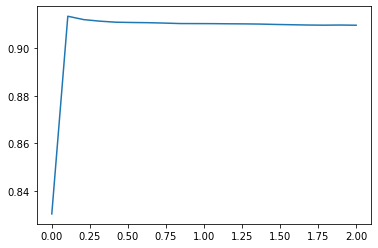

In [15]:
#Get Best C
c_s = np.linspace(1e-100,2,20)
scores = []
for i in tqdm(c_s):
    svm_t = sk.svm.LinearSVC(C=i,fit_intercept=False)
    svm_t.fit(bag_of_words_train,y_train)
    scores.append(svm_t.score(bag_of_words_test,y_test))
plt.plot(c_s,scores)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:12<00:00,  1.59it/s]


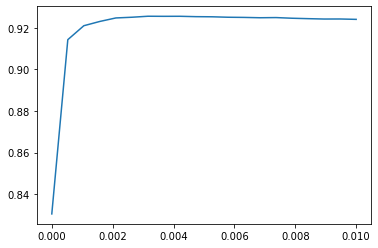

In [16]:
#Проверим интервал 0 - 0.25 и так далее
c_s_2 = np.linspace(1e-100,0.01,20)
scores_2 = []
for i in tqdm(c_s_2):
    svm_t = sk.svm.LinearSVC(C=i,fit_intercept=False)
    svm_t.fit(bag_of_words_train,y_train)
    scores_2.append(svm_t.score(bag_of_words_test,y_test))
plt.plot(c_s_2,scores_2)

Подберите важность суммы нарушений C, чтобы SVM работала лучше всего (подобрал - 0.004)

Выведите на экран 20 слов, которые больше всего голосуют за позитивность отзыва и 20 — за негативность вместе с соответствующими им коэффициентами натренированной линейной функции:
```python
ind = np.argsort(SVM.coef_[0])
for i in range(20):
    print(SVM.coef_[0][ind[i]], vocabulary[ind[i]])
print("\n")
for i in range(20):
    print(SVM.coef_[0][ind[-i-1]], vocabulary[ind[-i-1]]) 
```

In [17]:
#Final SVM
SVM = sk.svm.LinearSVC(C=0.004,fit_intercept=False)
SVM.fit(bag_of_words_train,y_train)
ind = np.argsort(SVM.coef_[0])
for i in range(20):
    print(SVM.coef_[0][ind[i]], vocabulary[ind[i]])
print("\n")
for i in range(20):
    print(SVM.coef_[0][ind[-i-1]], vocabulary[ind[-i-1]]) 
print(SVM.score(bag_of_words_test,y_test))

-0.30068512831514055 разочарование
-0.2621854641424842 увы
-0.2517849247695733 скучно
-0.2433768633542863 скучный
-0.24145922314020563 провал
-0.21795490059310144 никакой
-0.19850468995196588 отсутствует
-0.19257461260389597 единственное
-0.18991325273887436 неприятно
-0.1830083316266935 надеялся
-0.18088573794155216 досмотреть
-0.18030810879797707 понимаю
-0.1780068458609605 извините
-0.1771764088611552 верю
-0.17669321211834083 скучен
-0.17617369410854017 разочарована
-0.17389942727051957 ужасен
-0.17171898870053284 неужели
-0.17050769233307128 никакого
-0.16813690318204294 бред


0.21362679376148433 отличный
0.1876951856703793 великолепно
0.18475607619836365 фильм
0.17787348622356633 придраться
0.17468431322584163 отличная
0.17002953688158115 браво
0.16898258682615713 лучших
0.1684519248996208 приятно
0.16101043940938428 потрясающий
0.1595358870735765 потрясающе
0.15752002280933874 замечательный
0.1559185708931572 хорош
0.1520556754848541 прекрасен
0.1520546433557989 оторваться
0.15

Какой коэффициент соответствует словам: 'критика', 'странно', 'понимаю', 'деньги', 'даже' и еще 5 ваших слов по выбору. За что они голосуют: позитивность или негативность отзыва?

In [18]:

print(SVM.coef_[0][vocabulary.index('странно')],'странно') #Голосует за позитивность
print(SVM.coef_[0][vocabulary.index('понимаю')] , 'понимаю') #Голосует за негативность
print(SVM.coef_[0][vocabulary.index('деньги')],'деньги') #Голосует за негативность
#print(SVM.coef_[0][vocabulary.index('даже')]) # A даже тут нет!
print(SVM.coef_[0][vocabulary.index('отличный')],'отличный') #Голосует за позитивность
print(SVM.coef_[0][vocabulary.index('браво')],'браво') #Голосует за позитивность
print(SVM.coef_[0][vocabulary.index('потрясающий')] , 'потрясающий') #Голосует за позитивность
print(SVM.coef_[0][vocabulary.index('разочарование')],'разочарование') #Голосует за негативность
print(SVM.coef_[0][vocabulary.index('скучно')],'скучно') #Голосует за позитивность


0.04919342677357813 странно
-0.18030810879797707 понимаю
-0.08009715193889394 деньги
0.21362679376148433 отличный
0.17002953688158115 браво
0.16101043940938428 потрясающий
-0.30068512831514055 разочарование
-0.2517849247695733 скучно


Вычислите выступы, найдите и выведете на экран отзывы с минимальным и максимальным выступом, величину выступа, величину предсказания и сентиментность отзыва. Объясните в комментариях, почему найденный отзыв имеет такой маленький выступ, а другой найденный — такой большой:
```python
prediction = SVM.decision_function(bagOfWordsTest)
margins = np.multiply(prediction, data.loc[50000:]['Sentiment'].as_matrix()) #Deprecated since 0.23! Use .values!
ind = np.argsort(margins)
i = ind[-1] + 50000
print('Величина выступа = ', margins[ind[-1]])
print('Величина предсказания = ', prediction[ind[-1]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
print("\n")
i = ind[0] + 50000
print('Величина выступа = ', margins[ind[0]])
print('Величина предсказания = ', prediction[ind[0]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
```

Для объяснения отступов вам возможно пригодится код, который печатает коэффициенты w<sub>i</sub> линейной функции, значения соответствующих признаков и соответствующие слова. И все это делается в порядке убывания модуля произведения w<sub>i</sub>x<sub>i</sub>:
```python
k = ind[0]
ind2 = np.argsort(np.abs(np.multiply(SVM.coef_[0], bagOfWordsTest[k].todense()))).reshape(-1,1)
s = 0
for i in range((bagOfWordsTest[k]!=0).sum()):
    ii = ind2[-i-1].item()
    print('wi='+str(SVM.coef_[0][ii]), 'xi='+str(bagOfWordsTest[k,ii]),  vocabulary[ii])
    s += SVM.coef_[0][ii]*bagOfWordsTest[k,ii]
print('Проверка:',s) 
```

In [19]:
prediction = SVM.decision_function(bag_of_words_test)
margins = np.multiply(prediction, data_new.loc[50000:]['Sentiment'].values)
ind = np.argsort(margins)
i = ind[-1] + 50000
print('Величина выступа = ', margins[ind[-1]])
print('Величина предсказания = ', prediction[ind[-1]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
print("\n")
i = ind[0] + 50000
print('Величина выступа = ', margins[ind[0]])
print('Величина предсказания = ', prediction[ind[0]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])

Величина выступа =  6.427802931169301
Величина предсказания =  6.427802931169301
Сентиментность отзыва =  1


Чудесно! Великолепно! Потрясающе! Ярко! Динамично! Захватывающе! Невероятно! Свежо! Вдохновляюще! Незабываемо! Волшебно! Сказочно! И все это о данной картине... Только из кинотеатра, эмоции одолевают, но все же надо собратся и сказать, почему каждому следует ознакомиться с «Иллюзией обмана»... На что в первую очередь обращает свое внимание зритель? Правильно, на актеров. В этом плане Джесси Айзенберг и Вуди Харрельсон полностью перетягиваю канат на себя. Не отрицаю, у каждого из «великолепной четверки» есть собственная изюминка, но именно образы картежника и гипнотизера запоминаются. Быть может, это из-за их своеобразного соперничества, или же виной этому искрометный юмор, определенная доля наглости и, конечно же, потрясающий талант, но перед этими исполнителями преклоняюсь. Чуть позже в сюжет вплетается и герой Марка Руффало. Он - полная противоположность известных всадников, 

1 отзыв - очень много позитивных слов, отсюда и большой выступ. Во втором много негативных слов, отсюда и отрицательный выступ 

In [20]:
k = ind[0]
ind2 = np.argsort(np.abs(np.multiply(SVM.coef_[0], bag_of_words_test[k].todense()))).reshape(-1,1)
s = 0
for i in range((bag_of_words_test[k]!=0).sum()):
    ii = ind2[-i-1].item()
    print('wi='+str(SVM.coef_[0][ii]), 'xi='+str(bag_of_words_test[k,ii]),  vocabulary[ii])
    s += SVM.coef_[0][ii]*bag_of_words_test[k,ii]
print('Проверка:',s) 

wi=-0.2621854641424842 xi=1 увы
wi=-0.19850468995196588 xi=1 отсутствует
wi=0.18475607619836365 xi=1 фильм
wi=-0.16813690318204294 xi=1 бред
wi=-0.15465280389995723 xi=1 видимо
wi=-0.14440066030128348 xi=1 неинтересно
wi=-0.13452681219379362 xi=1 плюсы
wi=-0.13398926855301818 xi=1 абсолютно
wi=0.13330891458309485 xi=1 очень
wi=0.12213574406347336 xi=1 великолепен
wi=-0.11744019133144329 xi=1 вместо
wi=-0.11533759629902264 xi=1 решили
wi=-0.11509639636662806 xi=1 никак
wi=-0.11463770419082642 xi=1 должна
wi=-0.11266322278261909 xi=1 совершенно
wi=0.11206594169685223 xi=1 жизнь
wi=0.10809179879484875 xi=1 это
wi=-0.10754710720649091 xi=1 сего
wi=0.10532867574740545 xi=1 отдельное
wi=-0.10511317328030793 xi=1 ах
wi=-0.10331247516166853 xi=1 жаль
wi=-0.09908772267039577 xi=1 сплошная
wi=-0.09844342689158755 xi=1 девочки
wi=-0.09777789255847366 xi=1 творение
wi=-0.09564788927520602 xi=1 ужас
wi=-0.09342883804852134 xi=1 превратился
wi=-0.09249914980171815 xi=1 пусто
wi=-0.08950854475290874 

wi=-0.00966248854161701 xi=1 популярная
wi=-0.009571143150275978 xi=1 уверенность
wi=-0.009335473400261808 xi=1 нынче
wi=-0.009276952097923931 xi=1 группе
wi=-0.00919126291722752 xi=1 сэкономить
wi=0.00918964672487659 xi=1 всеми
wi=-0.009151318823316809 xi=1 адекватного
wi=-0.009017002648249305 xi=1 убрать
wi=-0.008949143206304855 xi=1 промежутки
wi=-0.008818209825108059 xi=1 дизайнеров
wi=-0.008805026356724931 xi=1 стюарт
wi=0.008619525650253018 xi=1 таким
wi=0.008582731526310549 xi=1 показателей
wi=-0.008248261926947466 xi=1 первых
wi=0.008112819429351268 xi=1 упущенное
wi=-0.00802994499069275 xi=1 игра
wi=0.007961190452448896 xi=1 сделал
wi=-0.007908633279066931 xi=1 мальчик
wi=-0.007832242529301156 xi=1 истинных
wi=-0.00771739702163669 xi=1 даша
wi=0.007674611337185627 xi=1 люди
wi=-0.007642854589520476 xi=1 дома
wi=-0.007605538938875609 xi=1 игры
wi=0.007537086953228732 xi=1 сомнения
wi=0.0074688635705907605 xi=1 подростковый
wi=-0.007410016766527313 xi=1 хайек
wi=-0.0072685143599

Нормализуйте признаки перед разбиением выборки на Train и Test так, чтобы вместо 0/1 стояли частоты употребления слов, деленные на длину отзыва. Подберите наилучшую константу C и опишите, как изменятся отзывы с минимальным и максимальным выступом? Что лучше: не нормализованные или нормализованные признаки? Почему?

# Ответ: Изменилось то, что оценка выступов не зависит от длины отзыва. Поэтому нормализованные кажется немного лучшим выбором. 

Нужно установить binary = False в CountVectorizer и добавить после fit_transform
```python
bagOfWords = preprocessing.normalize(bagOfWords, norm='l1')
```

In [26]:
count_vectorizer = sk.feature_extraction.text.CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 50000,binary = False)
bag_of_words = count_vectorizer.fit_transform(data_new['Text'])
bag_of_words


bag_of_words_2 = sk.preprocessing.normalize(bag_of_words, norm='l1')
bag_of_words_train = bag_of_words_2[:50000]
y_train = data_new['Sentiment'][:50000]
bag_of_words_test = bag_of_words_2[50000:]
y_test = data_new['Sentiment'][50000:]


In [33]:
#Normalized bag of words
#SVM
SVM = sk.svm.LinearSVC(C=102.5,fit_intercept=False)
SVM.fit(bag_of_words_train,y_train)
ind = np.argsort(SVM.coef_[0])
for i in range(20):
    print(SVM.coef_[0][ind[i]], vocabulary[ind[i]])
print("\n")
for i in range(20):
    print(SVM.coef_[0][ind[-i-1]], vocabulary[ind[-i-1]]) 

-43.82472078732255 разнесли
-35.80211485751141 увиденной
-34.963003236571836 скрывая
-34.43276409560525 пробел
-34.35383557302719 скрытые
-31.149027076945806 наигранный
-30.128595388802854 нише
-30.001927056153008 отхватил
-28.84173040715731 издательства
-27.18216648664186 разная
-25.886876823128276 нескончаемая
-25.80533617736305 удивляемся
-25.54516796918698 достоинств
-25.543436500331186 скрываться
-24.37794427651007 победителей
-23.607931920894707 естественных
-23.493925268458185 неустойчивой
-23.483595330402064 непринужденная
-23.36014468831091 скрываются
-23.3029588732187 бриджеса


29.818953124855575 отнимает
27.09121798359374 веревки
24.816047240794447 оживляет
24.24385500216047 придавать
24.183320715310142 презентации
23.80569145302434 отнес
23.00207991702145 причиняют
22.629107473789443 холмсе
22.124083332769647 слава
21.856333102776702 брату
21.68786731991325 потрепанный
21.525436383968206 сходств
21.365976993340364 скучный
21.046375163500226 обрекает
21.013687988281475 драй

In [34]:
prediction = SVM.decision_function(bag_of_words_test)
margins = np.multiply(prediction, data_new.loc[50000:]['Sentiment'].values)
ind = np.argsort(margins)
i = ind[-1] + 50000
print('Величина выступа = ', margins[ind[-1]])
print('Величина предсказания = ', prediction[ind[-1]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
print("\n")
i = ind[0] + 50000
print('Величина выступа = ', margins[ind[0]])
print('Величина предсказания = ', prediction[ind[0]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])

Величина выступа =  7.939398901973585
Величина предсказания =  7.939398901973585
Сентиментность отзыва =  1


Действительно, интересный молодежный фильм, немного наивный, но приятный для просмотра, ну, и грустный местами. Он на все 100% дает то, что можно ожидать от таких фильмов, и может даже немного больше! .


Величина выступа =  -4.221637874421948
Величина предсказания =  -4.221637874421948
Сентиментность отзыва =  1


«Придурки» продолжают свое победное шествие по большим экранах. Их игрища конечно на любителя, но их второе пришествие меня разочаровала по сравнению с первой частью. Иногда смешно, иногда очень смешно, то чаще противно, тупо и ужасно и.... Вывод - поржать можно, но от употребления пищи при этом следует отказаться, а то постигнет разочарование...


In [35]:
SVM.score(bag_of_words_test,y_test)

0.92768

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:58<00:00,  1.17s/it]


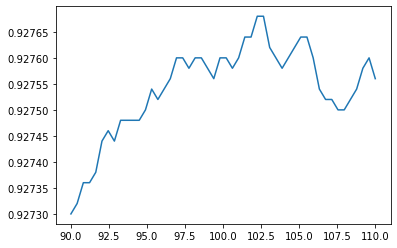

In [32]:
c_s = np.linspace(90,110,50)
scores = []
for i in tqdm(c_s):
    svm_t = sk.svm.LinearSVC(C=i,fit_intercept=False)
    svm_t.fit(bag_of_words_train,y_train)
    scores.append(svm_t.score(bag_of_words_test,y_test))
plt.plot(c_s,scores)